# Import Libraries:

In [340]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import seaborn as sns
%matplotlib inline
import random as rd

In [341]:
def get_distance(x1, x2):
    sum = 0
    for i in range(len(x1)):
        sum += (x1[i] - x2[i]) ** 2
    return np.sqrt(sum)

In [342]:
def random_centres(X, k):
  
    centroids = X[np.random.choice(range(len(X)), k)]    

    return np.array(centroids)

In [343]:
class RBF:

    def __init__(self, X, y, testX, testy, num_of_classes,k):
        self.X = X
        self.y = y

        self.tX = testX
        self.ty = testy

        self.number_of_classes = num_of_classes
        self.k = k
     

    def convert_to_one_hot(self, x, num_of_classes):
        arr = np.zeros((len(x), num_of_classes))
        for i in range(len(x)):
            c = int(x[i])
            arr[i][c] = 1
        return arr

    def rbf(self, x, c, s):
        distance = get_distance(x, c)
        return  np.exp(-distance**2 / 2* s ** 2)

    def rbf_list(self, X, centroids, std_list):
        RBF_list = []
        for x in X:
            RBF_list.append([self.rbf(x, c, s) for (c, s) in zip(centroids, std_list)])
        return np.array(RBF_list)

    def fit(self):

        self.centroids = random_centres(self.X, self.k)

       
        dMax = np.max([get_distance(c1, c2) for c1 in self.centroids for c2 in self.centroids])
        self.std_list = np.repeat(dMax / np.sqrt(2 * self.k), self.k)

        RBF_X = self.rbf_list(self.X, self.centroids, self.std_list)

        self.w = np.linalg.pinv(RBF_X.T @ RBF_X) @ RBF_X.T @ self.convert_to_one_hot(self.y, self.number_of_classes)

        RBF_list_tst = self.rbf_list(self.tX, self.centroids, self.std_list)

        self.pred_ty = RBF_list_tst @ self.w

        self.pred_ty = np.array([np.argmax(x) for x in self.pred_ty])

        diff = self.pred_ty - self.ty

        print('Accuracy: ', len(np.where(diff == 0)[0]) / len(diff))

        return self.pred_ty

# Load Dataset:

In [344]:
dataset=pd.read_csv('iris.csv')
print(dataset.head())
print(dataset.describe())
print(dataset.info())

   5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa
              5.1         3.5         1.4         0.2
count  149.000000  149.000000  149.000000  149.000000
mean     5.848322    3.051007    3.774497    1.205369
std      0.828594    0.433499    1.759651    0.761292
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.400000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null  

# Assign columns to the dataset

In [345]:

columns_value = ['sepal length (cm)',	'sepal width (cm)'	,'petal length (cm)',	'petal width (cm)','target']
dataset = dataset.values
dataset = pd.DataFrame(dataset,columns=columns_value)
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,4.9,3,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [346]:
dataset ['sepal length (cm)'] = dataset ['sepal length (cm)'].astype(np.float64)
dataset ['sepal width (cm)'] = dataset ['sepal width (cm)'].astype(np.float64)
dataset ['petal length (cm)'] = dataset ['petal length (cm)'].astype(np.float64)
dataset ['petal width (cm)'] = dataset ['petal width (cm)'].astype(np.float64)

# Preprocess or reduce the dimenstions using PCA


In [347]:
# store the labels into a variable y
y = dataset['target']
# store the iris data in X

X = dataset.iloc[:,:4]
# normalize the iris data 
X_Scaled  = ((X - X.mean()) / (X.std()))
X_Scaled = X_Scaled.values
X_Scaled = X_Scaled.astype(float)



## Calculate Covariance Matrix:

In [348]:
df_cov = np.cov(X_Scaled.T)
df_cov

array([[ 1.        , -0.10378415,  0.87128294,  0.81697087],
       [-0.10378415,  1.        , -0.41521773, -0.35073314],
       [ 0.87128294, -0.41521773,  1.        ,  0.9623143 ],
       [ 0.81697087, -0.35073314,  0.9623143 ,  1.        ]])

## Calculate the eigenvalues and eigenvectors 

In [349]:
eigen_val, eigen_vectors = np.linalg.eig(df_cov)

## Pick K (1) eigenvalues and form eigenvectors

In [350]:
n_components=1
top_eigen_vectors = eigen_vectors[:,:n_components]

## Transform the original matrix

In [351]:
X = np.matmul(np.array(X_Scaled),top_eigen_vectors)
X[0:10]

array([[-2.10086475],
       [-2.37994449],
       [-2.31706435],
       [-2.397002  ],
       [-2.07620112],
       [-2.45540349],
       [-2.2441807 ],
       [-2.35663311],
       [-2.20203659],
       [-2.17129706]])

In [352]:
columns_value = ['PCA1']

In [353]:
dataset = pd.DataFrame(X,columns=columns_value)

In [354]:

dataset = dataset.join(pd.Series(y, name='target'))

In [355]:
dataset.head()

,PCA1,target
0,-2.100865,Iris-setosa
1,-2.379944,Iris-setosa
2,-2.317064,Iris-setosa
3,-2.397002,Iris-setosa
4,-2.076201,Iris-setosa


In [356]:
# Shuffle your dataset 
shuffle_df = dataset.sample(frac=1)

shuffle_df = shuffle_df.reset_index(drop=True)
shuffle_df

# store the labels into a variable y
# y = shuffle_df['target']

y = shuffle_df['target'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
y = np.array(y)

# store the pixel data in X
X = shuffle_df.drop("target", axis = 1)
X= X.values

In [357]:
split = int(X.shape[0] * 0.80)
train_x, test_x, train_y, test_y = X[:split], X[split:], y[:split], y[split:]

In [358]:
RBF_CLASSIFIER = RBF(train_x, train_y, test_x, test_y, num_of_classes=3, k=10)

pred_ty=RBF_CLASSIFIER.fit()

Accuracy:  0.9666666666666667


In [359]:
print("Test Y     :",test_y)
print("Predicted Y:",pred_ty)

Test Y     : [1 2 0 2 2 0 1 1 0 0 0 1 0 0 1 1 1 2 0 1 0 1 0 1 0 1 2 2 2 0]
Predicted Y: [1 2 0 2 2 0 1 1 0 0 0 1 0 0 1 1 1 2 0 1 0 1 0 2 0 1 2 2 2 0]


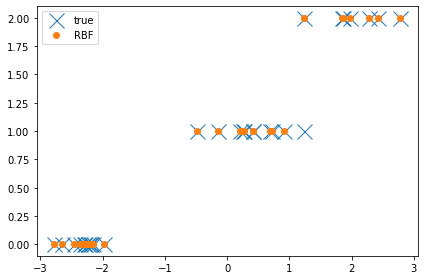

In [360]:
plt.plot(test_x, test_y, 'x', markersize=15, label='true')
plt.plot(test_x, pred_ty, 'o',  label='RBF')
plt.legend()
plt.tight_layout()
plt.show()

### Finally, let’s implement all these steps using the sklearn library so that we can compare the results:

In [361]:
#lets implement the same algorithm using sklearn libraries
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
#train
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
kmeans.fit(train_x)

KMeans(n_clusters=3, random_state=42)

In [362]:
# Predict

y_kmeans_bulitin = kmeans.fit_predict(test_x)
y_kmeans_bulitin

array([1, 2, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1,
       0, 1, 0, 1, 2, 2, 2, 0])

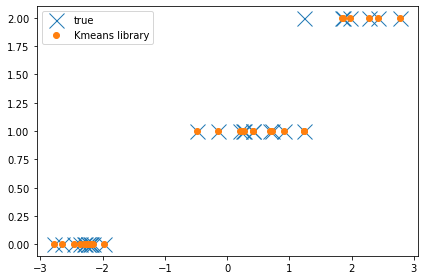

In [363]:
plt.plot(test_x, test_y, 'x', markersize=15, label='true')
plt.plot(test_x, y_kmeans_bulitin, 'o',  label='Kmeans library')
plt.legend()
plt.tight_layout()
plt.show()